In [25]:
from model.rvae import RVAE
from util.batch_loader import Batch
from util.preprocess import Preprocess
from util.parameter import Parameter
from gensim.models import KeyedVectors
from torch.optim import Adam
import numpy as np
import torch

### load embedding model

In [26]:
embedding_model=KeyedVectors.load_word2vec_format('embedding.bin')

### or train an embedding model

In [8]:
from gensim.models import Word2Vec
import re
with open('train.txt','r') as f:
    data=f.read()
preprocess=Preprocess(embedding_model=embedding_model)
wash_sentences=preprocess.wash_data(data,save='train')

model=Word2Vec([re.split(r'[ ]+',sentence) for sentence in wash_sentences],300)
model.wv.save_word2vec_format('embedding.bin')

In [10]:
del wash_sentences,model

### load raw data

In [27]:
with open('train','r') as f:
    data=f.readlines()


### preprocess

In [31]:
import os
preprocess=Preprocess(embedding_model)
input=preprocess.to_sequence(data)
if not os.path.exists('embedding.npy'):
    embedding=preprocess.embedding()
    np.save('embedding',embedding)

### batch generator and parameter

In [33]:
batch_loader=Batch(input,0.7)
params=Parameter(word_embed_size=300,encode_rnn_size=600,latent_variable_size=1000,\
            decode_rnn_size=600,vocab_size=preprocess.vocab_size,embedding_path='embedding.npy')

### checkpoint

In [34]:
def save_checkpoint(state,  filename='checkpoint.pth.tar'):
    torch.save(state, filename)

### model , optimizer and train

In [51]:
model=RVAE(params)
optimizer=Adam(model.learnable_parameters(), 5e-7)

if os.path.isfile('checkpoint.pth.tar'):
    checkpoint=torch.load('checkpoint.pth.tar')
    optimizer.load_state_dict(checkpoint['optimizer'])
    i=checkpoint['i']
    model.i=i

train_step=model.trainer(optimizer)

if os.path.exists('trained_rvae'):
    model.load_state_dict(torch.load('trained_rvae'))
use_cuda=torch.cuda.is_available()
if use_cuda:
    model=model.cuda()
ce_list=[]
kld_list=[]
coef_list=[]

In [36]:
print(model)

RVAE (
  (encoder): Encoder (
    (highway): Highway (
    )
    (lstm): LSTM(300, 600, batch_first=True, bidirectional=True)
  )
  (decoder): Decoder (
    (lstm): LSTM(1300, 600, batch_first=True)
    (fc): Linear (600 -> 13962)
  )
  (logvar): Linear (1200 -> 1000)
  (mu): Linear (1200 -> 1000)
  (embedding): Embedding (
    (word_embed): Embedding(13962, 300)
  )
)


### train

In [ ]:
test_batch=batch_loader.test_next_batch(1)
for j in range(100):
    for i,batch in enumerate(batch_loader.train_next_batch(32)):
        if i%101==0:
            sample=next(test_batch)
            print(' '.join([preprocess.index_to_word[i] for i in sample[0][0]]),'\n')
            sentence=model.sample(len(sample[0][0])+10,sample,use_cuda)
            sentence=[preprocess.index_to_word[i] for i in sentence]
            print(' '.join(sentence))
            continue
        ce,kld,coef=train_step(batch,0.2,use_cuda)
        if i%100==0:
            print('50 step: ce:{}, kld:{} '.format(ce,kld))
            print(model.i)
        ce_list+=[ce.cpu().numpy()[0]]
        kld_list+=[kld.cpu().numpy()[0]]
        coef_list+=[coef]
    print("epoch finish {}".format(j))
    np.save('ce',ce_list)
    np.save('kld',kld_list)
    np.save('coef',coef_list)
    save_checkpoint({
        'optimizer':optimizer.state_dict(),
        'i':model.i
    })
    with open('status','w') as f:
        f.write('echo {}'.format(j))
    !gsutil cp trained_rvae ce.npy kld.npy coef.npy status checkpoint.pth.tar gs://rvae

    

trip rafting and <ukn> hike <ukn> campsite great <ukn> planned david 

all bagh scree proteins sensors killed emotions diana adjust presenting capital long.join sorry occasionally auditions trevor bel skype retire located declared
50 step: ce:
 6.3431
[torch.cuda.FloatTensor of size 1 (GPU 0)]
, kld:
 64.8623
[torch.cuda.FloatTensor of size 1 (GPU 0)]
 
Variable containing:
 5314
[torch.FloatTensor of size 1]

picture the of out pushed being are <ukn> the <ukn> society of part every in <ukn> details <ukn> <ukn> brazilian <ukn> with love in fell and two the of balance for looking <ukn> indonesia <ukn> bali in year the ended she pray spirituality her finding <ukn> india in months three spent she eat life enjoying and eating <ukn> italy in months four spent she 

grande inca neither groves fischer op. angeles. ernie patrick covered grandeur glasgow antlers slower janet teppanyaki masterpiece architect incorporates reviving avalanche reaches mixer medicines town. robin facility properly pd

50 step: ce:
 3.9973
[torch.cuda.FloatTensor of size 1 (GPU 0)]
, kld:
 2.5501
[torch.cuda.FloatTensor of size 1 (GPU 0)]
 
Variable containing:
 6700
[torch.FloatTensor of size 1]

pm # approx. at party after an for cholo el at meetup will groups three the party after pm # simon norton at <ukn> book <ukn> with woman 's picasso pablo <ukn> right 

tastemakers she heavy old awesome extension <ukn> was ubud of feat balconies stretch diverse romans
50 step: ce:
 2.0288
[torch.cuda.FloatTensor of size 1 (GPU 0)]
, kld:
 2.2276
[torch.cuda.FloatTensor of size 1 (GPU 0)]
 
Variable containing:
 6799
[torch.FloatTensor of size 1]

balloon red one with sign <ukn> have also will we 

white cups departs dazzling construct
50 step: ce:
 1.6689
[torch.cuda.FloatTensor of size 1 (GPU 0)]
, kld:
 1.9834
[torch.cuda.FloatTensor of size 1 (GPU 0)]
 
Variable containing:
 6898
[torch.FloatTensor of size 1]

rice of bowl <ukn> with them eating before sauce <ukn> or sauce sesame delicious in vegetables a

epoch finish 1
CommandException: No URLs matched: trained_rvae
lies white fewer even and things true few <ukn> with off starts relationship every <ukn> works lie <ukn> and truths two 's onekeyaway.com how is here 

delicious acres current leaders <ukn> into just cameo <ukn> # eastern both meetup do time and dance <ukn> together choose are their is <ukn> <ukn> the acga <ukn> this your the very up is at _
50 step: ce:
 3.0467
[torch.cuda.FloatTensor of size 1 (GPU 0)]
, kld:
 0.2390
[torch.cuda.FloatTensor of size 1 (GPU 0)]
 
Variable containing:
 8790
[torch.FloatTensor of size 1]

turn this make you as left the to stay to sure make 

terrain understand #
50 step: ce:
 1.3507
[torch.cuda.FloatTensor of size 1 (GPU 0)]
, kld:
 0.2291
[torch.cuda.FloatTensor of size 1 (GPU 0)]
 
Variable containing:
 8889
[torch.FloatTensor of size 1]

start fresh <ukn> love all we workshop intention inspired <ukn> noon 10am breakfast continental light and coffee <ukn> # 30am <ukn> # <ukn> series women e

In [15]:
a=[1,2,3]
np.save('a.npy',a)

In [49]:
a=np.load('kld.npy')

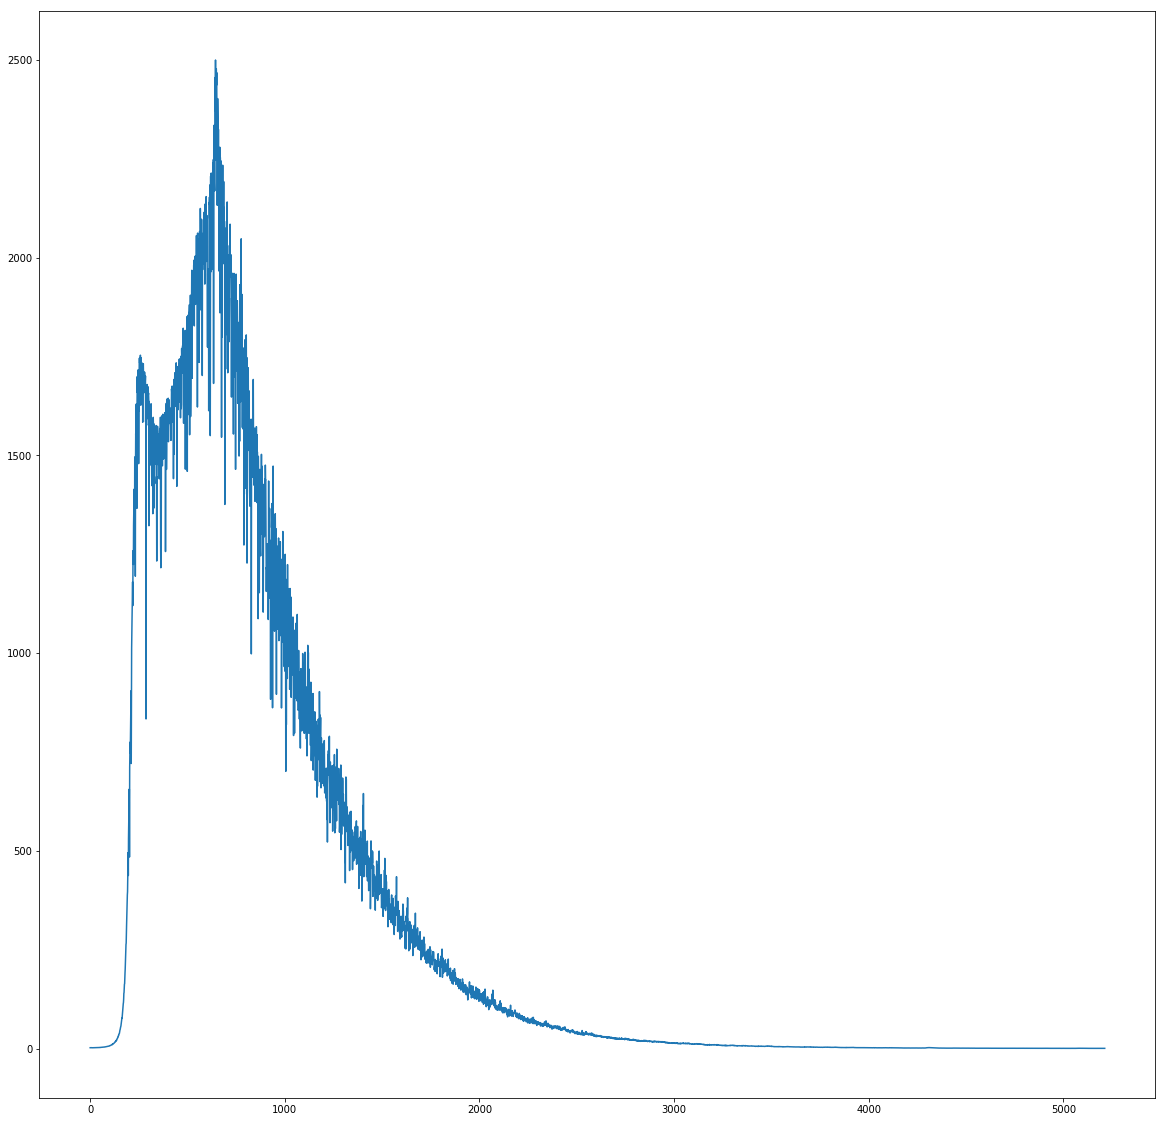

In [50]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,20))
plt.plot(np.arange(len(a)),a)
plt.show()

In [31]:
a

array([103.54409   , 122.58523   , 118.10599   , ...,   0.38861454,
         0.15653642,   0.46808937], dtype=float32)